# Multivariate Gaussians

In [45]:
import scipy
import numpy as np
from numpy.random import randn
from ipywidgets import interact
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import kf_book.mkf_internal as mkf_internal
from filterpy.stats import plot_3d_covariance
from filterpy.stats import multivariate_multiply
from filterpy.stats import plot_covariance_ellipse
from kf_book.book_plots import figsize, FloatSlider
from kf_book.gaussian_internal import plot_correlated_data
from filterpy.stats import gaussian, multivariate_gaussian
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap

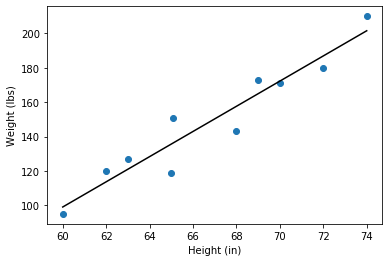

In [2]:
height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]

plot_correlated_data(height, weight, 'Height (in)', 'Weight(lbs)', False)

In [3]:
W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[2.50000e-02, 2.72750e+00],
       [2.72750e+00, 3.27235e+02]])

In [4]:
# Unbiased estimator
np.cov(H, W, bias = 1)

array([[2.00000e-02, 2.18200e+00],
       [2.18200e+00, 2.61788e+02]])

In [5]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.95592287, 6.95592287],
       [6.95592287, 6.95592287]])

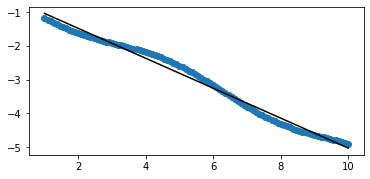

[[ 6.95592287 -3.08427   ]
 [-3.08427     1.38681544]]


In [6]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X) *.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

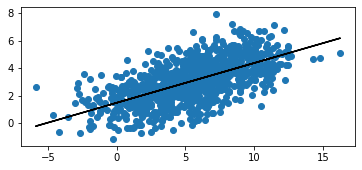

[[11.22158944  3.24430135]
 [ 3.24430135  2.34111457]]


In [7]:
X = np.linspace(1, 10, 1000) + randn(1000) *2
Y = np.linspace(1, 5, 1000) + randn(1000)

plot_correlated_data(X, Y)
print(np.cov(X, Y))

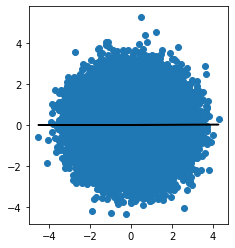

[[0.99675287 0.00235464]
 [0.00235464 1.00246566]]


In [8]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Recall the equation for the normal distribution:

$$\LARGE f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}e^{{-\frac{1}{2}\frac{(x - \mu)^{2}}{\sigma^2}}}}$$

The multivariate normal distribution in n dimensions:

$$\LARGE f(\textbf{x}, \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{n}\lvert \Sigma \rvert}} e^{-\frac{1}{2}(\textbf{x} - \mu)^{T}\Sigma^{-1}(\textbf{x} - \mu)}$$

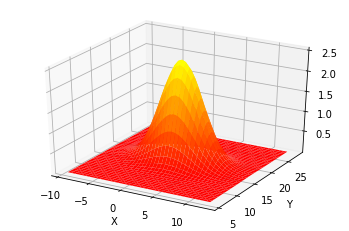

In [9]:
mean = [2, 17]
cov = [[10, 0], [0, 4]]

mkf_internal.plot_3d_covariance(mean, cov)

In [10]:
%precision 4
x = [2.5, 7.3]
mu = [2.0, 7.0]
P = [[8.0, 0.0], [0.0, 3.0]]

multivariate_gaussian(x, mu, P)

0.0315

In [11]:
try:
    print('{:.4f}'.format(scipy.stats.multivariate_normal(mu, P).pdf(x)))
except:
    print('You have an old version of scipy, upgrade it now!')

0.0315


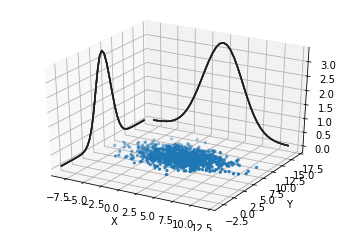

In [12]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

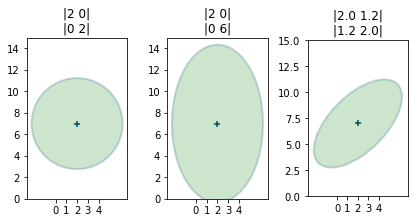

In [13]:
mkf_internal.plot_3_covariances()

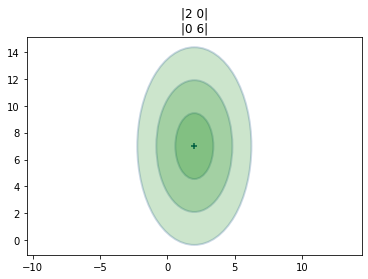

In [14]:
P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc = 'g', alpha = 0.2, std = [1, 2, 3], title = '|2 0|\n|0 6|')
plt.gca().grid(b = False)

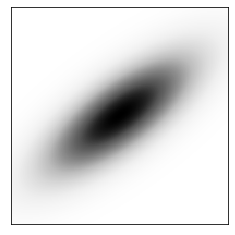

In [15]:
plot_cov_ellipse_colormap(cov = [[2, 1.2], [1.2, 1.3]])

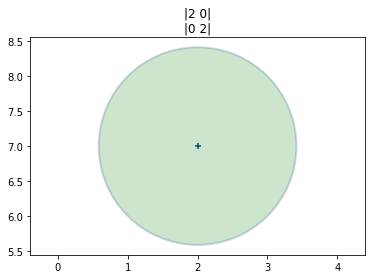

In [16]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 0|\n|0 2|')
plt.gca().grid(b = False)

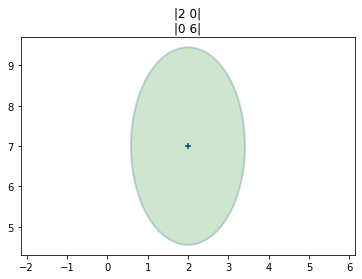

In [17]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 0|\n|0 6|')

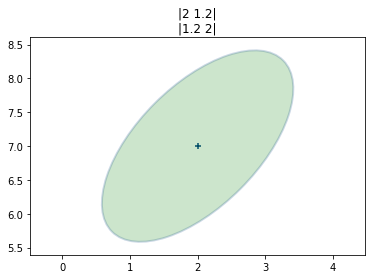

In [18]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 1.2|\n|1.2 2|')

[[  18.5249  135.701 ]
 [ 135.701  1092.29  ]]


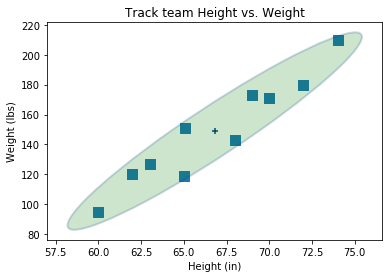

In [19]:
cov_hw = np.cov(np.vstack((height, weight)), bias = 1)
print(cov_hw)

plt.scatter(height, weight, s = 120, marker = 's')
plt.title('Track team Height vs. Weight')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc = 'g', alpha = 0.2, axis_equal = False, std =2)

Text(0, 0.5, '$Years$')

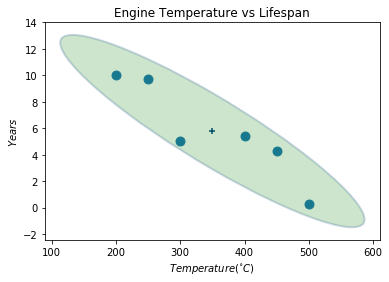

In [20]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s = 80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc = 'g', alpha = 0.2, axis_equal = False, std = 2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('$Temperature (^{\circ}C)$')
plt.ylabel('$Years$')

In [21]:
fig = None

def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig:
        plt.close(fig)
    fig = plt.figure(figsize = (4, 4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]
    plot_covariance_ellipse((10, 10), P1, axis_equal = False, show_semiaxis = True)
    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

with figsize(y = 6):
    interact(plot_covariance, 
             var_x = FloatSlider(5, min = 0, max = 20), 
             var_y = FloatSlider(5, min = 0, max = 20), 
             cov_xy = FloatSlider(1.5, min = 0, max = 50, step = 0.2))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…

### Pearson's Correlation Coefficient 

<font size="5">This value can range in value from -1 to 1.

A value greater than 0 indicates that the relationship is a positive and a negative value indicates that there is a negative correlation. 

Value near -1 or 1 indicate a very strong correlation, and values near 0 indicate a very weak correlation.</font>

$$\LARGE \rho = \frac{COV(X,Y)}{\sigma_{x}\sigma_{y}}$$

<font size="5">Independent variables are always also uncorrelated. The reverse does not hold true</font>


In [22]:
pearsonr(height, weight)[0]

0.9539731096080194

In [23]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527254

Text(0, 0.5, 'Y')

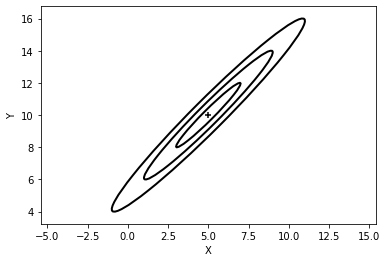

In [24]:
P = [[4, 3.9],[3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec = 'k', std = [1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y')

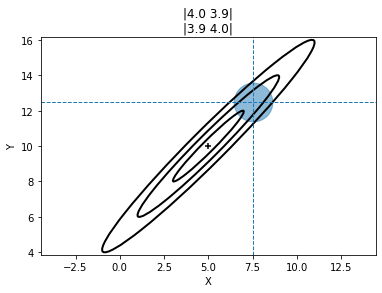

In [25]:
mkf_internal.plot_correlation_covariance()

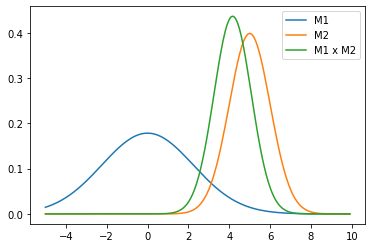

In [26]:
mkf_internal.plot_gaussian_multiply()

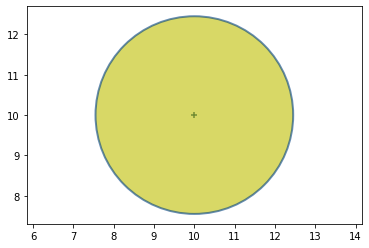

In [27]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc = 'y', alpha = 0.6)

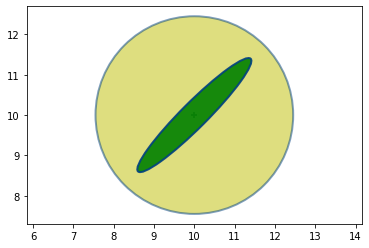

In [28]:
P1 = [[2.0, 1.9], [1.9, 2.0]]
plot_covariance_ellipse((10, 10), P0, fc = 'y', alpha = 0.5)
plot_covariance_ellipse((10, 10), P1, fc = 'g', alpha = 0.9)

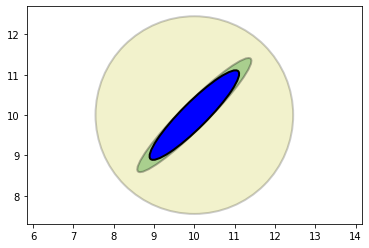

In [29]:
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec = 'k', fc = 'y', alpha = 0.2)
plot_covariance_ellipse((10, 10), P1, ec = 'k', fc = 'g', alpha = 0.3)
plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'b')

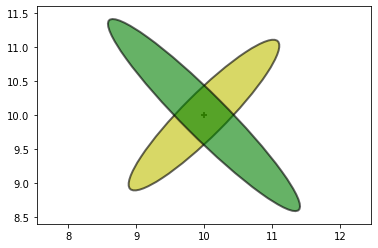

In [30]:
P3 = [[2.0, -1.9], [-1.9, 2.0]]
plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'y', alpha = 0.6)
plot_covariance_ellipse((10, 10), P3, ec = 'k', fc = 'g', alpha = 0.6)

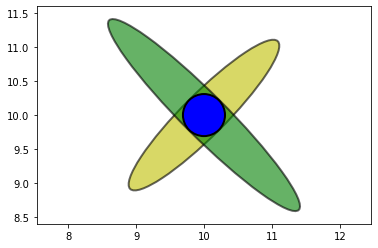

In [31]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]

plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'y', alpha = 0.6)
plot_covariance_ellipse((10, 10), P3, ec = 'k', fc = 'g', alpha = 0.6)
plot_covariance_ellipse((10, 10), P4, ec = 'k', fc = 'b')

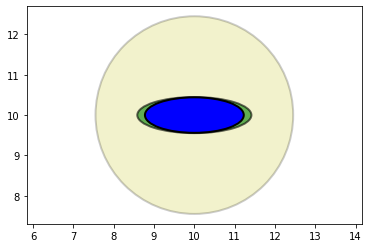

In [32]:
P1 = [[2.0, 0.0], [0.0, 0.2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]

plot_covariance_ellipse((10, 10), P0, ec = 'k', fc = 'y', alpha = 0.2)
plot_covariance_ellipse((10, 10), P1, ec = 'k', fc = 'g', alpha = 0.6)
plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'b')

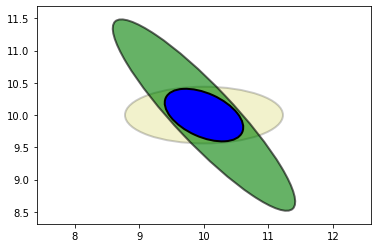

In [33]:
P3 = [[2.0, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]

plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'y', alpha = 0.2)
plot_covariance_ellipse((10, 10), P3, ec = 'k', fc = 'g', alpha = 0.6)
plot_covariance_ellipse((10, 10), P4, ec = 'k', fc = 'b')

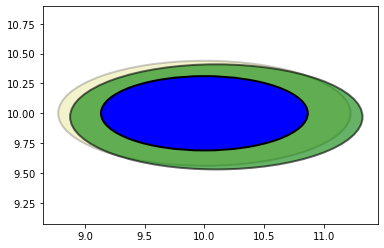

In [34]:
P5 = multivariate_multiply((10, 10), P2, (10, 10), P2)

plot_covariance_ellipse((10, 10), P2, ec = 'k', fc = 'y', alpha = 0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec = 'k', fc = 'g', alpha = 0.6)
plot_covariance_ellipse(P5[0], P5[1], ec = 'k', fc = 'b')

# Hidden Variables

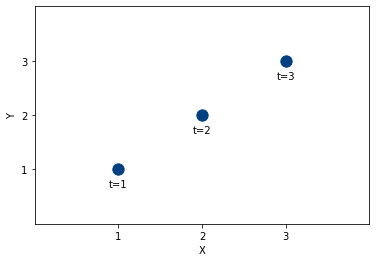

In [37]:
mkf_internal.show_position_chart()

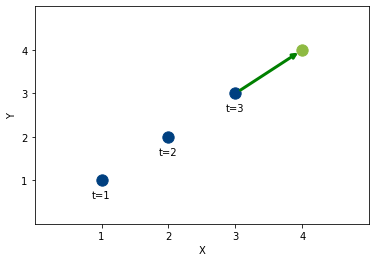

In [38]:
mkf_internal.show_position_prediction_chart()

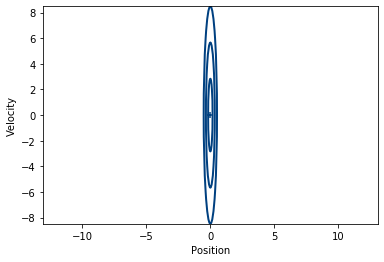

In [40]:
mkf_internal.show_x_error_chart(1)

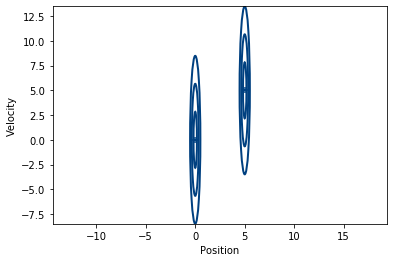

In [41]:
mkf_internal.show_x_error_chart(2)

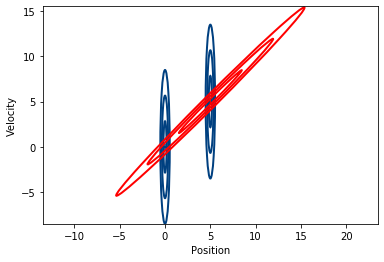

In [42]:
mkf_internal.show_x_error_chart(3)

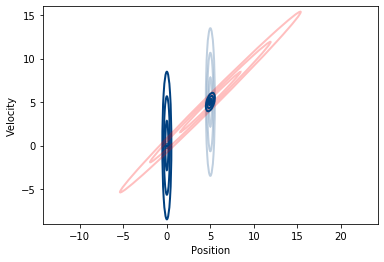

In [44]:
mkf_internal.show_x_error_chart(4)

In [47]:
mu = [0.3, 5.0, 10.0]
C = np.array([[1.0, 0.03, 0.2],
             [0.03, 4.0, 0.0],
             [0.2, 0.0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size = 1000)

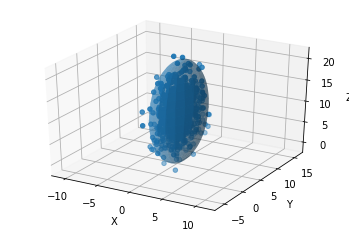

In [50]:
ax = plot_3d_covariance(mu, C, alpha = 0.4, std  = 3, limit_xyz = True)
ax.scatter(sample[:, 0], sample[:, 1], zs = sample[:, 2])

<font size="5"></font>
$$\huge \begin{align}
f_{x} &= v\Delta t = 15 \times 2 \\
\bar{x}_{k} &= 10 + (15 \times 2) = 40
\end{align}$$
\